In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data
data = pd.read_csv('/content/Airbnb_Data.csv')

In [ ]:
data.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [4]:
data.keys()

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [6]:
# Check missing values
data.isnull().sum()

,0
id,0
log_price,0
property_type,0
room_type,0
amenities,0
accommodates,0
bathrooms,200
bed_type,0
cancellation_policy,0
cleaning_fee,0


In [7]:
data.shape

(74111, 29)

In [8]:
# Dropping columns with too many missing values
data.drop(['first_review', 'last_review', 'host_response_rate', 'review_scores_rating', 'thumbnail_url'], axis=1,
          inplace=True)

In [9]:
data.shape

(74111, 24)

In [10]:
data.isnull().sum()

,0
id,0
log_price,0
property_type,0
room_type,0
amenities,0
accommodates,0
bathrooms,200
bed_type,0
cancellation_policy,0
cleaning_fee,0


In [21]:
# filling some missing values wiht mean
data['bathrooms'].fillna(data['bathrooms'].mean(), inplace=True)
data['bedrooms'].fillna(data['bedrooms'].mean(), inplace=True)
data['beds'].fillna(data['beds'].mean(), inplace=True)
data['cleaning_fee'].fillna(data['cleaning_fee'].mean(), inplace=True)

<ipython-input-21-7bae942010da>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bathrooms'].fillna(data['bathrooms'].mean(), inplace=True)
<ipython-input-21-7bae942010da>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

EDA

In [22]:
# List The columns that are of dtype, float
float_columns = data.select_dtypes(include=['float64']).columns

In [23]:
float_columns

Index(['log_price', 'bathrooms', 'latitude', 'longitude', 'bedrooms', 'beds'], dtype='object')

In [24]:
# Change bathrooms, bedrooms and bed to int64
data['bathrooms'] = data['bathrooms'].astype('int64')
data['bedrooms'] = data['bedrooms'].astype('int64')
data['beds'] = data['beds'].astype('int64')

In [25]:
data.isnull().sum()

,0
id,0
log_price,0
property_type,0
room_type,0
amenities,0
accommodates,0
bathrooms,0
bed_type,0
cancellation_policy,0
cleaning_fee,0


In [26]:
# Extract the features with missing values into a different dataframe
missing_data  = data[data.isnull().any(axis=1)]

In [27]:
missing_data

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,host_since,instant_bookable,latitude,longitude,name,neighbourhood,number_of_reviews,zipcode,bedrooms,beds
6,11825529,4.418841,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",3,1,Real Bed,moderate,True,...,2017-03-03,t,33.980454,-118.462821,Beach Town Studio and Parking!!!11h,NaN,15,90292,1,1
9,5385260,3.583519,House,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,1,Real Bed,moderate,True,...,2017-03-12,t,33.992563,-117.895997,No.7 Queen Size Cozy Room 舒适大床房,NaN,2,91748,1,1
14,583490,4.955827,Apartment,Entire home/apt,"{Kitchen,Heating,""Smoke detector"",""Carbon mono...",2,1,Real Bed,strict,True,...,2012-11-20,f,33.778526,-118.145926,VINTAGE 1930s Mediteranian Apt. (NOT a party S...,NaN,2,90804,1,1
26,19407360,4.553877,Apartment,Entire home/apt,"{TV,""Wireless Internet"",Pool,Kitchen,""Elevator...",2,1,Real Bed,flexible,True,...,2013-06-20,f,34.100686,-118.364204,Retro West Hollywood Studio + Pool!,NaN,1,NaN,1,1
28,851978,5.192957,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",3,1,Real Bed,flexible,True,...,2015-09-26,f,34.051584,-118.242923,Sweet Hollywood Home / 1bd1bth,NaN,4,90028,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74098,8342838,4.553877,Apartment,Entire home/apt,"{Internet,""Wireless Internet"",""Air conditionin...",4,1,Real Bed,flexible,True,...,2014-10-28,f,34.104450,-118.330558,Bohemian Hollywood BLVD Charm!!!,NaN,177,90028,0,2
74099,4615631,4.276666,Condominium,Private room,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1,Real Bed,moderate,True,...,2015-11-10,t,34.096308,-118.348016,Luxury Condo in West Hollywood!!!,NaN,50,90046,1,1
74101,18077717,4.584967,Apartment,Private room,"{TV,Internet,""Wireless Internet"",Pool,Kitchen,...",1,1,Real Bed,moderate,True,...,2014-04-01,f,34.020021,-118.498239,Cozy room in heart of Santa Monica!,NaN,4,90403,1,1
74104,14934112,4.356709,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1,Real Bed,strict,True,...,2014-03-01,f,41.909067,-87.623046,Gold Coast Specialty,NaN,6,60610,1,1


In [31]:
data.neighbourhood = data.neighbourhood.fillna(data.neighbourhood.mode()[0])

In [35]:
# Dropna in Zipcode
data['zipcode'] = data['zipcode'].dropna()

In [36]:
data.dropna(inplace=True)

In [37]:
data.isnull().sum()

,0
id,0
log_price,0
property_type,0
room_type,0
amenities,0
accommodates,0
bathrooms,0
bed_type,0
cancellation_policy,0
cleaning_fee,0


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72959 entries, 0 to 74110
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      72959 non-null  int64  
 1   log_price               72959 non-null  float64
 2   property_type           72959 non-null  object 
 3   room_type               72959 non-null  object 
 4   amenities               72959 non-null  object 
 5   accommodates            72959 non-null  int64  
 6   bathrooms               72959 non-null  int64  
 7   bed_type                72959 non-null  object 
 8   cancellation_policy     72959 non-null  object 
 9   cleaning_fee            72959 non-null  bool   
 10  city                    72959 non-null  object 
 11  description             72959 non-null  object 
 12  host_has_profile_pic    72959 non-null  object 
 13  host_identity_verified  72959 non-null  object 
 14  host_since              72959 non-null  obj

In [44]:
## Create a dataframe with columns of object dtype from data
object_columns = data.select_dtypes(include=['object']).columns

In [47]:
object_columns= pd.DataFrame(object_columns)
object_columns

,0
0,property_type
1,room_type
2,amenities
3,bed_type
4,cancellation_policy
5,city
6,description
7,host_has_profile_pic
8,host_identity_verified
9,host_since


In [50]:
# Apply label encoder on property_type
from sklearn.preprocessing import LabelEncoder

data.apply(LabelEncoder().fit_transform)

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,host_since,instant_bookable,latitude,longitude,name,neighbourhood,number_of_reviews,zipcode,bedrooms,beds
0,20348,142,0,0,6043,2,1,4,2,1,...,1068,0,43286,42415,10325,76,2,195,1,1
1,18371,161,0,0,6169,6,1,4,2,1,...,2979,1,58368,43475,64634,251,6,74,3,3
2,23567,137,0,0,21029,4,1,4,1,1,...,2742,1,62897,59793,65352,246,10,84,1,3
3,40669,584,17,0,38328,3,1,4,0,1,...,2187,0,25638,2668,9267,324,0,748,2,2
4,11455,107,0,0,54537,1,1,4,1,1,...,2138,1,32756,33883,31556,118,4,341,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,45651,92,0,1,66110,0,1,4,0,0,...,1431,0,45650,61608,71230,604,0,203,1,1
74107,40030,147,0,0,38128,3,2,4,1,1,...,2567,0,1438,13438,58959,254,16,515,2,4
74108,65500,177,0,0,60341,4,1,4,1,1,...,987,1,45040,60422,42996,604,43,203,2,2
74109,58164,187,0,0,48047,1,1,4,2,1,...,3069,1,53306,39982,26027,591,0,61,0,2


In [51]:
data.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,host_since,instant_bookable,latitude,longitude,name,neighbourhood,number_of_reviews,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1,Real Bed,strict,True,...,2012-03-26,f,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,11201,1,1
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1,Real Bed,strict,True,...,2017-06-19,t,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,10019,3,3
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1,Real Bed,moderate,True,...,2016-10-25,t,40.808110,-73.943756,The Garden Oasis,Harlem,10,10027,1,3
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1,Real Bed,flexible,True,...,2015-04-19,f,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,94117.0,2,2
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1,Real Bed,moderate,True,...,2015-03-01,t,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,20009,0,1


In [53]:
data1 = data[['property_type', 'room_type', 'amenities', 'neighbourhood', 'bed_type', 'cancellation_policy', 'city', 'description', 'host_has_profile_pic',
              'host_identity_verified', 'host_since', 'instant_bookable', 'name', 'zipcode']]

In [60]:
# Apply label encoder on property_type
from sklearn.preprocessing import LabelEncoder

data2 = data1.apply(LabelEncoder().fit_transform)

In [61]:
data2.head()

,property_type,room_type,amenities,neighbourhood,bed_type,cancellation_policy,city,description,host_has_profile_pic,host_identity_verified,host_since,instant_bookable,name,zipcode
0,0,0,6043,76,4,2,4,9844,1,1,1068,0,10325,195
1,0,0,6169,251,4,2,4,18779,1,0,2979,1,64634,74
2,0,0,21029,246,4,1,4,54739,1,1,2742,1,65352,84
3,17,0,38328,324,4,0,5,62090,1,1,2187,0,9267,748
4,0,0,54537,118,4,1,2,15731,1,1,2138,1,31556,341


In [56]:
data.drop(columns=['property_type', 'room_type', 'amenities', 'neighbourhood', 'bed_type', 'cancellation_policy', 'city', 'description', 'host_has_profile_pic',
              'host_identity_verified', 'host_since', 'instant_bookable', 'name', 'zipcode'])

,id,log_price,accommodates,bathrooms,cleaning_fee,latitude,longitude,number_of_reviews,bedrooms,beds
0,6901257,5.010635,3,1,True,40.696524,-73.991617,2,1,1
1,6304928,5.129899,7,1,True,40.766115,-73.989040,6,3,3
2,7919400,4.976734,5,1,True,40.808110,-73.943756,10,1,3
3,13418779,6.620073,4,1,True,37.772004,-122.431619,0,2,2
4,3808709,4.744932,2,1,True,38.925627,-77.034596,4,0,1
...,...,...,...,...,...,...,...,...,...,...
74106,14549287,4.605170,1,1,False,40.709025,-73.939405,0,1,1
74107,13281809,5.043425,4,2,True,33.871549,-118.396053,16,2,4
74108,18688039,5.220356,5,1,True,40.706749,-73.942377,43,2,2
74109,17045948,5.273000,2,1,True,40.738535,-74.000157,0,0,2


In [57]:
# Change True: 1 and False:0 in cleaning_fee
data['cleaning_fee'] = data['cleaning_fee'].apply(lambda x: 1 if x == True else 0)

In [63]:
# Concat data and data1
data_clean = pd.concat([data, data2], axis=1)

In [59]:
data_clean.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,bed_type,cancellation_policy,city,description,host_has_profile_pic,host_identity_verified,host_since,instant_bookable,name,zipcode
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1,Real Bed,strict,1,...,4,2,4,9844,1,1,1068,0,10325,195
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1,Real Bed,strict,1,...,4,2,4,18779,1,0,2979,1,64634,74
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1,Real Bed,moderate,1,...,4,1,4,54739,1,1,2742,1,65352,84
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1,Real Bed,flexible,1,...,4,0,5,62090,1,1,2187,0,9267,748
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1,Real Bed,moderate,1,...,4,1,2,15731,1,1,2138,1,31556,341


In [64]:
data.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,host_since,instant_bookable,latitude,longitude,name,neighbourhood,number_of_reviews,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1,Real Bed,strict,1,...,2012-03-26,f,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,11201,1,1
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1,Real Bed,strict,1,...,2017-06-19,t,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,10019,3,3
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1,Real Bed,moderate,1,...,2016-10-25,t,40.808110,-73.943756,The Garden Oasis,Harlem,10,10027,1,3
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1,Real Bed,flexible,1,...,2015-04-19,f,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,94117.0,2,2
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1,Real Bed,moderate,1,...,2015-03-01,t,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,20009,0,1


In [65]:
data2.head()

,property_type,room_type,amenities,neighbourhood,bed_type,cancellation_policy,city,description,host_has_profile_pic,host_identity_verified,host_since,instant_bookable,name,zipcode
0,0,0,6043,76,4,2,4,9844,1,1,1068,0,10325,195
1,0,0,6169,251,4,2,4,18779,1,0,2979,1,64634,74
2,0,0,21029,246,4,1,4,54739,1,1,2742,1,65352,84
3,17,0,38328,324,4,0,5,62090,1,1,2187,0,9267,748
4,0,0,54537,118,4,1,2,15731,1,1,2138,1,31556,341


In [66]:
data1.head()

,property_type,room_type,amenities,neighbourhood,bed_type,cancellation_policy,city,description,host_has_profile_pic,host_identity_verified,host_since,instant_bookable,name,zipcode
0,0,0,6043,76,4,2,4,9844,1,1,1068,0,10325,195
1,0,0,6169,251,4,2,4,18779,1,0,2979,1,64634,74
2,0,0,21029,246,4,1,4,54739,1,1,2742,1,65352,84
3,17,0,38328,324,4,0,5,62090,1,1,2187,0,9267,748
4,0,0,54537,118,4,1,2,15731,1,1,2138,1,31556,341


In [67]:
# Float and int columns
intfloat_columns = data.select_dtypes(include=['int64','float64']).columns

In [68]:
intfloat_columns

Index(['id', 'log_price', 'accommodates', 'bathrooms', 'cleaning_fee',
       'latitude', 'longitude', 'number_of_reviews', 'bedrooms', 'beds'],
      dtype='object')

In [69]:
data4 = data[intfloat_columns]

In [70]:
data4.head()

,id,log_price,accommodates,bathrooms,cleaning_fee,latitude,longitude,number_of_reviews,bedrooms,beds
0,6901257,5.010635,3,1,1,40.696524,-73.991617,2,1,1
1,6304928,5.129899,7,1,1,40.766115,-73.989040,6,3,3
2,7919400,4.976734,5,1,1,40.808110,-73.943756,10,1,3
3,13418779,6.620073,4,1,1,37.772004,-122.431619,0,2,2
4,3808709,4.744932,2,1,1,38.925627,-77.034596,4,0,1


In [71]:
# Concat data2 and data4
data_cleaned = pd.concat([data2, data4], axis=1)

In [72]:
data_cleaned.head()

,property_type,room_type,amenities,neighbourhood,bed_type,cancellation_policy,city,description,host_has_profile_pic,host_identity_verified,...,id,log_price,accommodates,bathrooms,cleaning_fee,latitude,longitude,number_of_reviews,bedrooms,beds
0,0,0,6043,76,4,2,4,9844,1,1,...,6901257,5.010635,3,1,1,40.696524,-73.991617,2,1,1
1,0,0,6169,251,4,2,4,18779,1,0,...,6304928,5.129899,7,1,1,40.766115,-73.989040,6,3,3
2,0,0,21029,246,4,1,4,54739,1,1,...,7919400,4.976734,5,1,1,40.808110,-73.943756,10,1,3
3,17,0,38328,324,4,0,5,62090,1,1,...,13418779,6.620073,4,1,1,37.772004,-122.431619,0,2,2
4,0,0,54537,118,4,1,2,15731,1,1,...,3808709,4.744932,2,1,1,38.925627,-77.034596,4,0,1


In [73]:
# Save data_cleaned as csv and download it
data_cleaned.to_csv('data_cleaned.csv', index=False)

Answers To Key Questions:

In [76]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72959 entries, 0 to 74110
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   property_type           72959 non-null  int64  
 1   room_type               72959 non-null  int64  
 2   amenities               72959 non-null  int64  
 3   neighbourhood           72959 non-null  int64  
 4   bed_type                72959 non-null  int64  
 5   cancellation_policy     72959 non-null  int64  
 6   city                    72959 non-null  int64  
 7   description             72959 non-null  int64  
 8   host_has_profile_pic    72959 non-null  int64  
 9   host_identity_verified  72959 non-null  int64  
 10  host_since              72959 non-null  int64  
 11  instant_bookable        72959 non-null  int64  
 12  name                    72959 non-null  int64  
 13  zipcode                 72959 non-null  int64  
 14  id                      72959 non-null  int

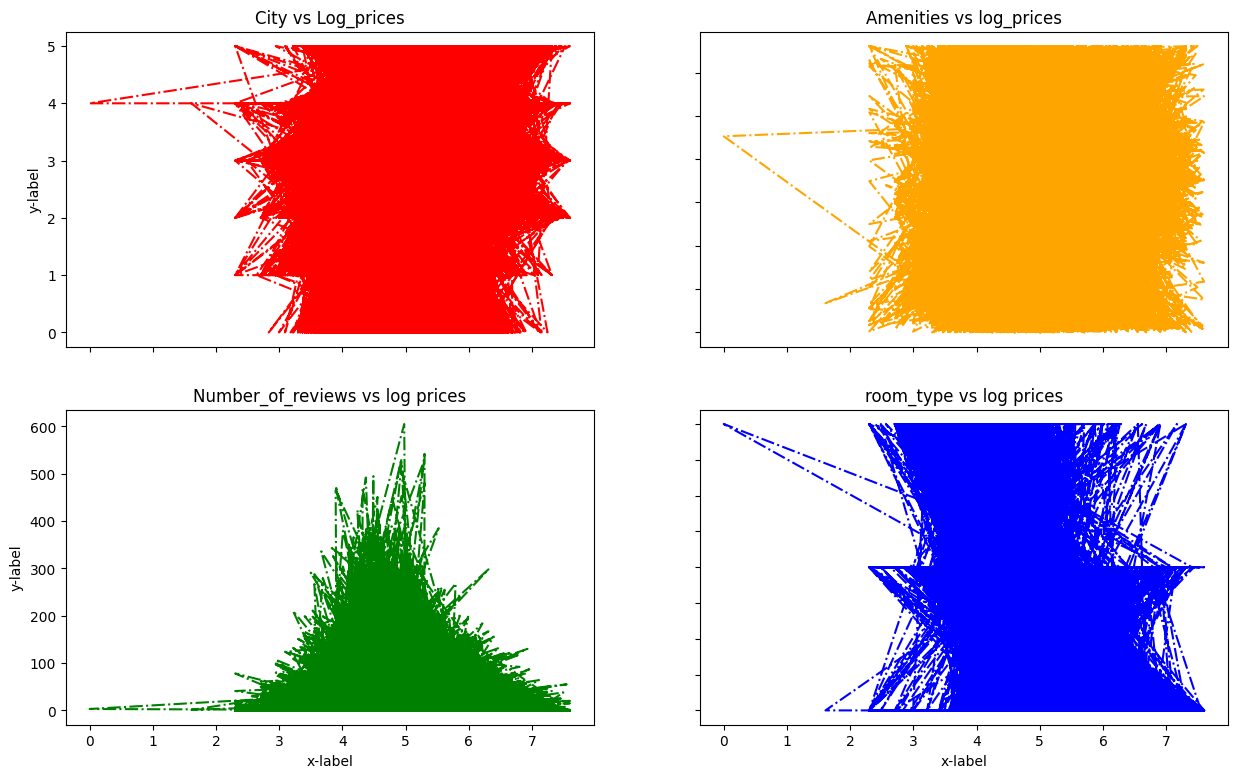

In [83]:
# 1. What factors (location, amenities, reviews) most influence Airbnb prices?


# Plot location, amenities, and reviews against log_prices
fig, axs = plt.subplots(2, 2)
# Set figure sizes
fig.set_size_inches(15, 9)
axs[0, 0].plot('log_price', 'city', data = data_cleaned, linestyle = '-.', color = 'r')
axs[0, 0].set_title('City vs Log_prices')
axs[0, 1].plot('log_price', 'amenities', data = data_cleaned, linestyle = '-.', color ='orange')
axs[0, 1].set_title('Amenities vs log_prices')
axs[1, 0].plot('log_price', 'number_of_reviews', data = data_cleaned, linestyle = '-.', color = 'green')
axs[1, 0].set_title('Number_of_reviews vs log prices')
axs[1, 1].plot('log_price', 'room_type', data = data_cleaned, linestyle = '-.', color = 'blue')
axs[1, 1].set_title('room_type vs log prices')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

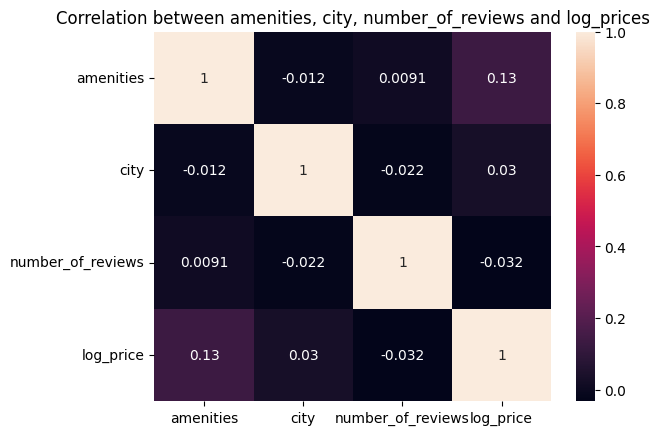

In [87]:
# Show the correlation between location, amenities, and reviews and log_prices in heatmap
sns.heatmap(data_cleaned[['amenities', 'city', 'number_of_reviews', 'log_price']].corr(), annot=True)
# Set title for the heatmap
plt.title('Correlation between amenities, city, number_of_reviews and log_prices')
plt.show()

Amenities has the highest contribution to prices with correlation coefficient of 0.13